In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")





In [2]:
sns.set(rc={'figure.figsize':(15,10)})

### Reading Dataset

In [3]:
dataset = pd.read_csv('Datasets/Algerian_Cleaned_new.csv',usecols=list(range(1,16)))


In [4]:
dataset.rename(str.strip,axis='columns',inplace=True)

### Basic Profile of The data

In [5]:
dataset.head() # top 5 rows of the data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia Region
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia Region
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia Region
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bejaia Region
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia Region


In [6]:
dataset.tail() # last 5 rows of the data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes Region
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,Sidi-Bel Abbes Region
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes Region
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes Region
243,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,Sidi-Bel Abbes Region


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(7), int64(6), object(2)
memory usage: 28.7+ KB


Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
- Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
- FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely and Bejaia Region,Sidi-Bel Abbes Region

In [8]:
dataset.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.774180,16.664754,7.006557
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.175318,14.204824,7.438889
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [9]:
dataset.describe(include='O')

,Classes,Region
count,243,244
unique,8,2
top,fire,Bejaia Region
freq,131,122


- There are 8 unique classes and 2 unique regions in the dataset

In [10]:
dataset.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

- Only one missing value in the entire dataset

In [11]:
## we have day month and year columns in our data

print(f"Unique Number of dates ",len(dataset.day.unique()))
print(f"Unique Number of months ",len(dataset.month.unique()))
print(f"Unique Number of year ",len(dataset.year.unique()))

Unique Number of dates  31
Unique Number of months  4
Unique Number of year  1


In [12]:
print(dataset.year.unique())

print(dataset.month.unique())

[2012]
[6 7 8 9]


- We have the data about the year 2021 and in the months of jun,july,aug,sep

#### Categorizing the data according to feature nature

In [13]:
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtype!="O"]
categorical_features=[feature for feature in dataset.columns if feature not in numerical_features]

print(numerical_features,"\n",categorical_features)

['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'] 
 ['Classes', 'Region']


In [14]:
continuous_features=[feature for feature in numerical_features if dataset[feature].nunique()>25]
discrete_features=[feature for feature in numerical_features if feature not in continuous_features]

print(continuous_features,"\n",discrete_features)

['day', 'RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'] 
 ['month', 'year', 'Temperature', 'Ws']


### Univariate analysis

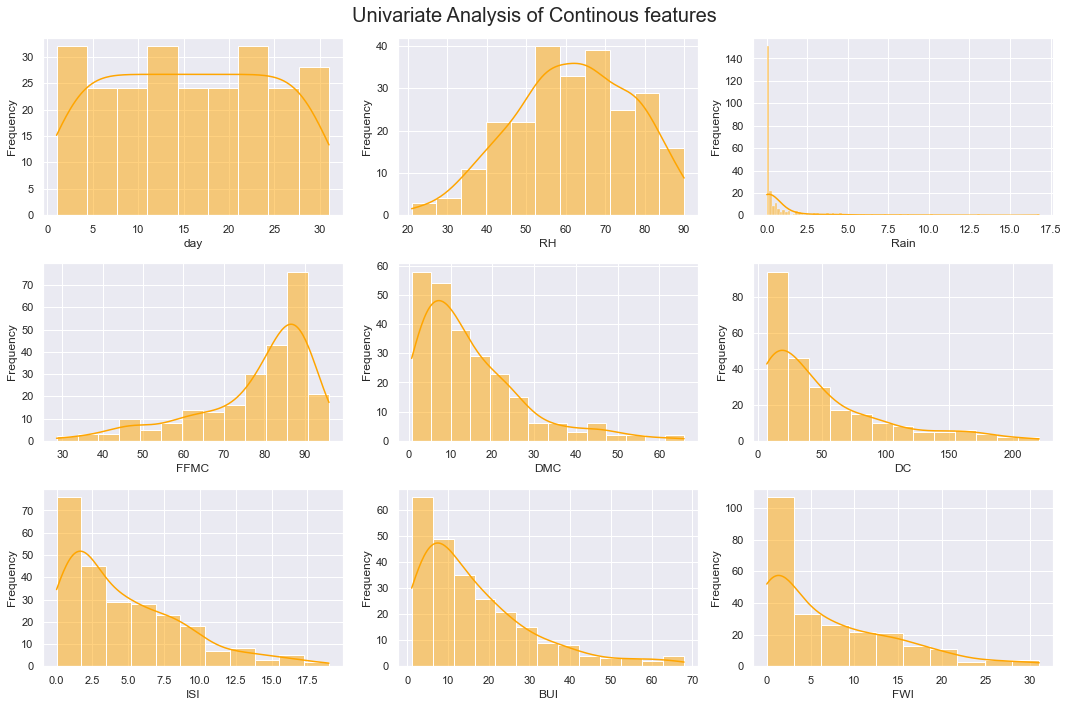

In [15]:
## Plotting Histograms for continous data
i=1
plt.suptitle("Univariate Analysis of Continous features",fontsize=20)
for feature in continuous_features:
    plt.subplot(3,3,i)
    i+=1
    sns.histplot(dataset[feature],kde=True,color='orange',)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.tight_layout()

- RH is approximately normally distributed
- DMC,DC,ISI,BUI,FWI are Rightly skewed
- FFMC is left skwed

### Univariate analysis of discrete features

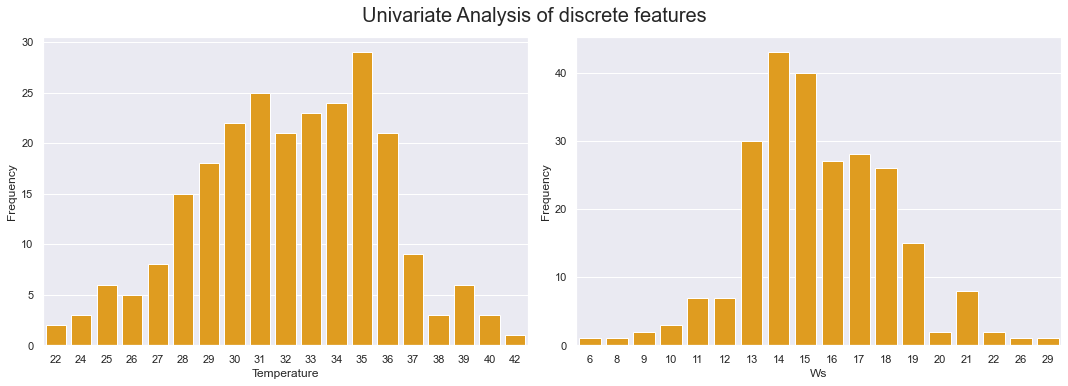

In [16]:
## Plotting count plots for discrete data
i=1
plt.suptitle("Univariate Analysis of discrete features",fontsize=20)
for feature in discrete_features[2:]:
    plt.subplot(2,2,i)
    i+=1
    sns.countplot(dataset[feature],color='orange',)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.tight_layout()

### Univariate analysis for categorical variables

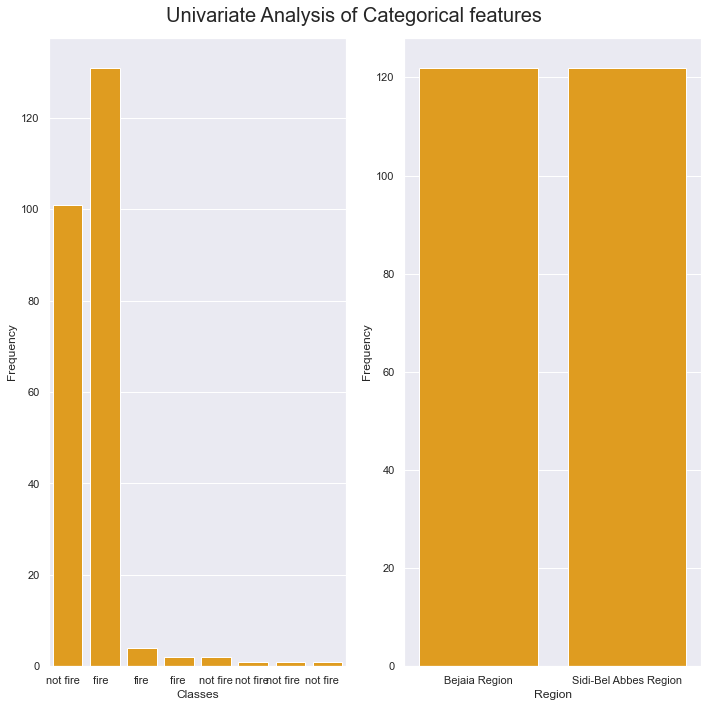

In [17]:
sns.set(rc={'figure.figsize':(10,10)})
i=1
plt.suptitle("Univariate Analysis of Categorical features",fontsize=20)
for feature in categorical_features:
    plt.subplot(1,2,i)
    i+=1
    sns.countplot(dataset[feature],color='orange',)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.tight_layout()

- We can see that there are only 2 features available with different names

In [18]:
dataset['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [19]:
dataset['Classes'].replace({"not fire   ":0,'fire   ':1,'fire':1,'not fire':0,'not fire ':0,'not fire     ':0,'not fire    ':0,'fire ':1},inplace=True)

## Fire = 1
## not fire = 0

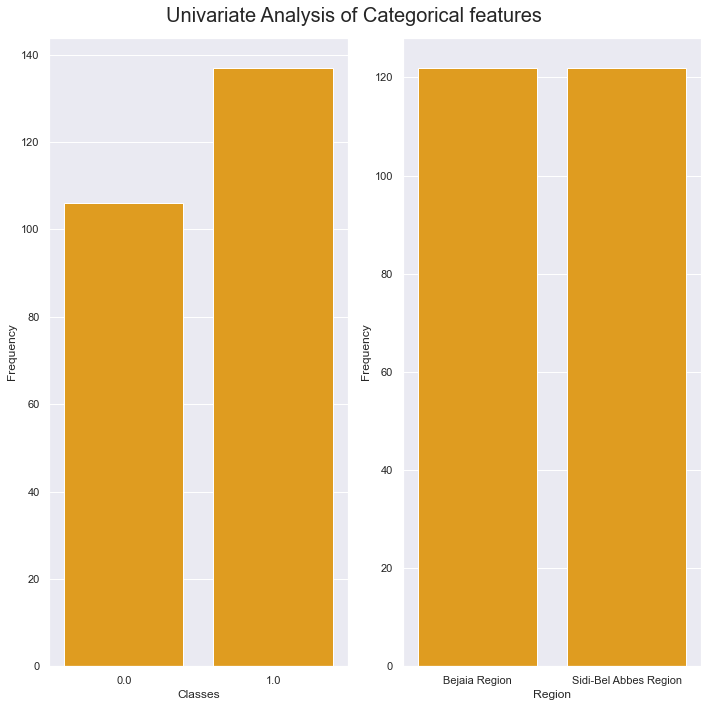

In [20]:
sns.set(rc={'figure.figsize':(10,10)})
i=1
plt.suptitle("Univariate Analysis of Categorical features",fontsize=20)
for feature in categorical_features:
    plt.subplot(1,2,i)
    i+=1
    sns.countplot(dataset[feature],color='orange')
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.tight_layout()

### Bivariate Analysis 


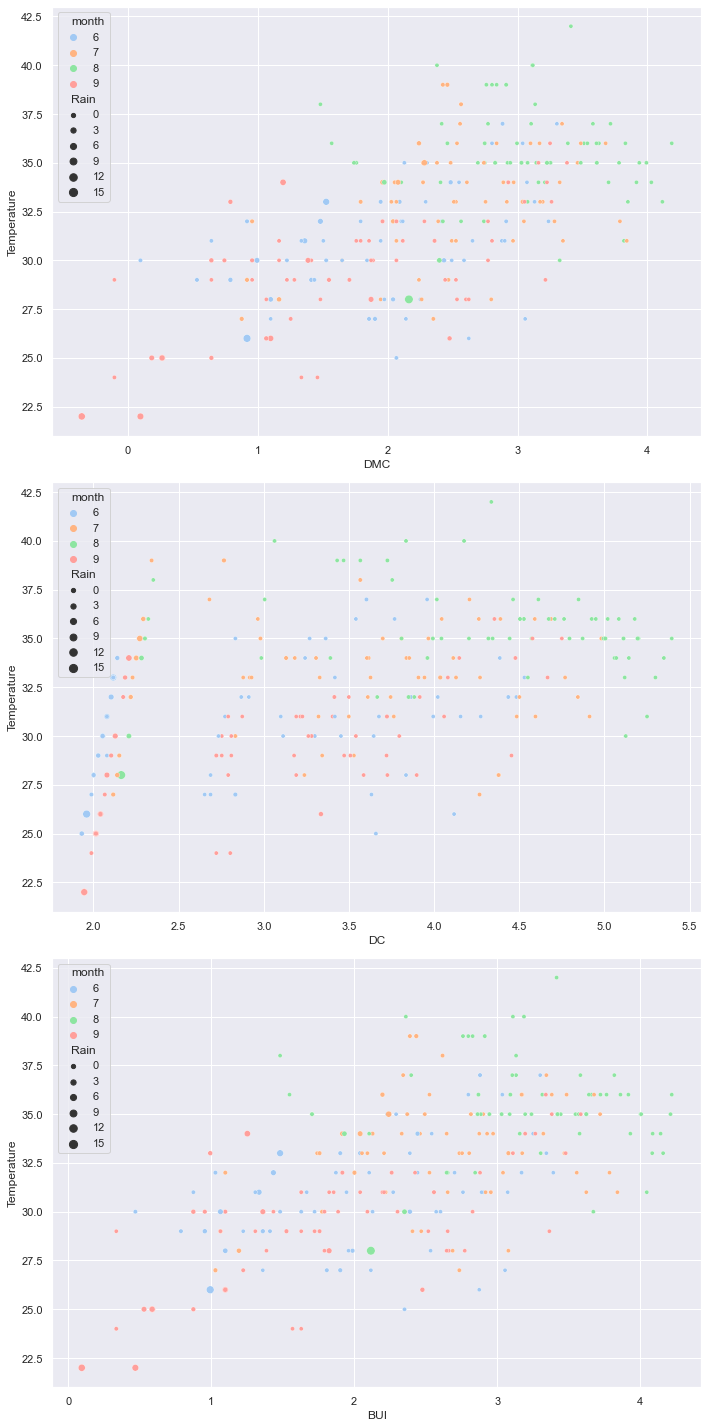

In [21]:
## We can apply logarithimic transformation for rightly skwed data and compare with temperature
sns.set(rc={'figure.figsize':(10,20)})
right_skew_features=['DMC','DC','ISI','BUI','FWI']
i=1
for feature in right_skew_features:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        plt.subplot(3,1,i)
        i+=1
        data[feature]=np.log(data[feature])
        sns.scatterplot(data[feature],data['Temperature'],color='y',hue=data['month'],size=data['Rain'],palette='pastel')
        plt.xlabel(feature)
        plt.ylabel("Temperature")
        plt.tight_layout()
        

- We can observe that the Rains are occured when there are less temperature and less Drought Conditions

### Bivariate Analysis with categorical feature

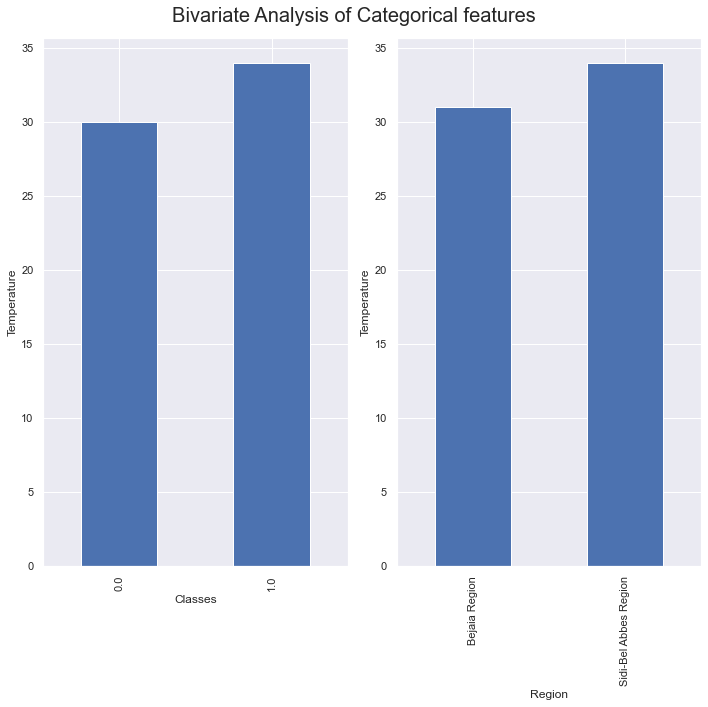

In [22]:
sns.set(rc={'figure.figsize':(10,10)})
i=1
plt.suptitle("Bivariate Analysis of Categorical features",fontsize=20)
for feature in categorical_features:
    plt.subplot(1,2,i)
    i+=1
    dataset.groupby(feature)['Temperature'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Temperature")
    plt.xticks(rotation=90)
    plt.tight_layout()

Text(0, 0.5, 'Temperature')

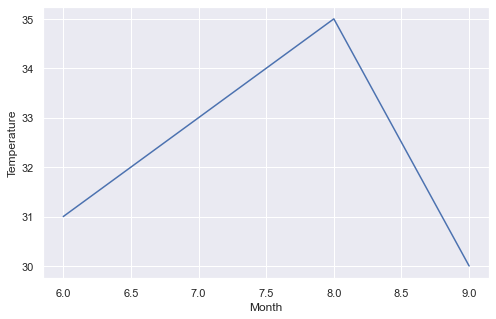

In [23]:
## Analysing the temperature with year
sns.set(rc={'figure.figsize':(8,5)})
dataset.groupby('month')['Temperature'].median().plot()
plt.xlabel('Month')
plt.ylabel('Temperature')

- We can observe that in the month August we have recorded high temperatures

### Checking Outliers

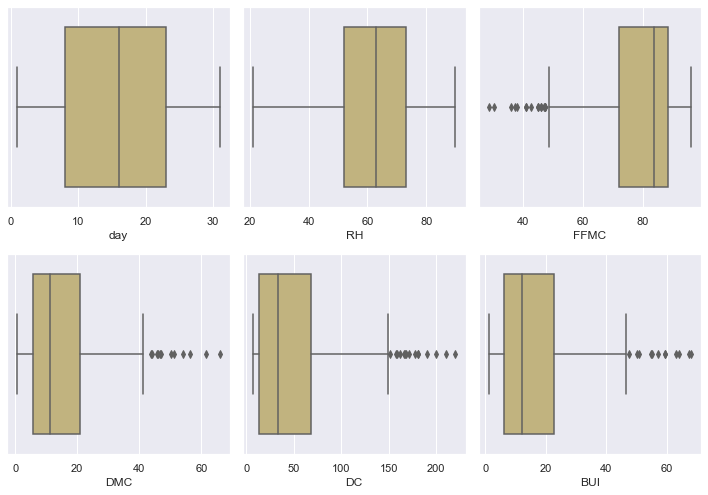

In [24]:
## Checking outliers for continous data
sns.set(rc={'figure.figsize':(10,10)})
i=1
for feature in continuous_features:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        plt.subplot(3,3,i)
        i+=1
        data[feature]=np.log(data[feature])
        sns.boxplot(feature,data=dataset,color='y')
        plt.tight_layout()

- We can observe there are outliers in some features of the dataset

### Checking MultiCollinearity

In [25]:
dataset.iloc[:,3:].corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.607551,0.455504,0.558393,0.516015
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.690637,-0.348587,-0.569997,-0.432161
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.015248,0.029756,0.028799,-0.069964
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347105,-0.299171,-0.322682,-0.379097
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.739730,0.589652,0.686033,0.769492
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.674499,0.982073,0.874778,0.585658
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.498909,0.941904,0.740189,0.511123
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498909,1.000000,0.635891,0.907461,0.735197
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941904,0.635891,1.000000,0.857771,0.586639
FWI,0.558393,-0.569997,0.028799,-0.322682,0.686033,0.874778,0.740189,0.907461,0.857771,1.000000,0.719216


- There is 98% correlation between the features BUI and DMC 
- And 94% correlation between BUI and DC
- By observation BUI has highly correlated with the featres DMC(98%), DC(94%), FWI(85%)
- And DMC And FWI are highly positively correlated(87%)
- FWI and ISI are highly positively correlated(90%)

- By this There is High multicollinearity between the independent features


<AxesSubplot:>

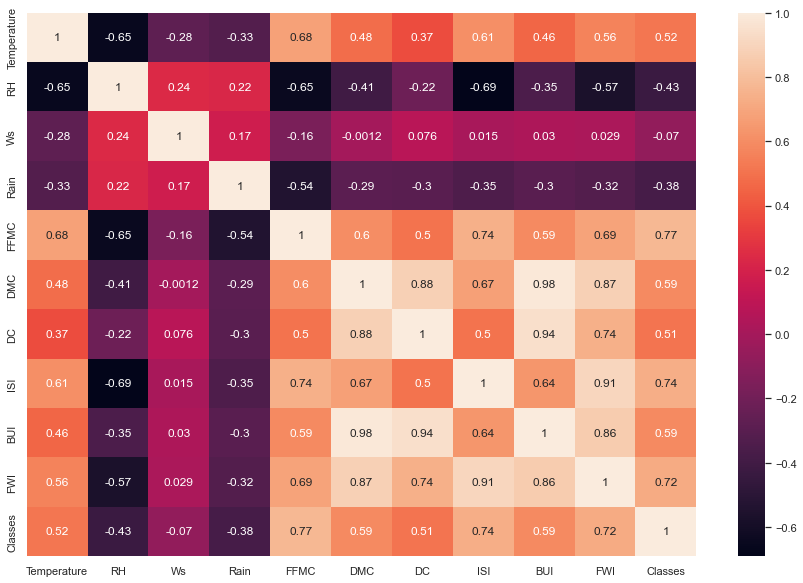

In [26]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(dataset.iloc[:,3:].corr(),annot=True)

### Checking Multi collinearity Betweeen Independent variables

- By using Varinace_inflation_factor we can determine multicollinearity

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
def calc_vif(df):
    vif=pd.DataFrame()
    vif['Features']=df.columns
    vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return vif

In [29]:
data=dataset.copy()
calc_vif(data[numerical_features])

,Features,VIF
0,day,1.481568
1,month,1.089354
2,year,516.459148
3,Temperature,2.429335
4,RH,2.796692
5,Ws,1.314206
6,Rain,1.551798
7,FFMC,3.928972
8,DMC,76.339464
9,DC,25.415010


- We can observe there is HIGH Multicollinearity between the independent Features

In [38]:
dataset['Classes'].fillna(1.0,inplace=True)

dataset['Region'].replace({'Bejaia Region':0,'Sidi-Bel Abbes Region':1},inplace=True)

In [39]:
df=dataset.drop(['day','month','year'],axis=1)

In [40]:
X=df.iloc[:,1:]
y=df['Temperature']

In [41]:
import statsmodels.api as sm
X = sm.add_constant(X)


In [42]:
X

,const,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1.0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,0
1,1.0,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,0
2,1.0,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,0
3,1.0,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,0
4,1.0,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,1.0,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0,1
240,1.0,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0.0,1
241,1.0,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0.0,1
242,1.0,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0.0,1


In [43]:
y

0      29
1      29
2      26
3      25
4      27
       ..
239    30
240    28
241    27
242    24
243    24
Name: Temperature, Length: 244, dtype: int64

In [44]:
model= sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     28.05
Date:                Sun, 16 Oct 2022   Prob (F-statistic):           8.34e-37
Time:                        13:29:11   Log-Likelihood:                -557.36
No. Observations:                 244   AIC:                             1139.
Df Residuals:                     232   BIC:                             1181.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.3403      2.556     12.652      0.000      27.304      37.377
RH            -0.0718      0.018     -3.922      0.000      -0.108      -0.036
Ws            -0.2109      0.062     -3.392      0.001      -0.333      -0.088
Rain           0.0333      0.098      0.340      0.734      -0.159       0.226
FFMC           0.0824      0.024      3.372      0.001       0.034       0.131
DMC            0.0430      0.116      0.369      0.712      -0.186       0.272
DC             0.0137      0.016      0.841      0.401      -0.018       0.046
ISI            0.1828      0.147      1.242      0.215      -0.107       0.473
BUI           -0.0377      0.145     -0.260      0.795      -0.324       0.248
FWI           -0.0707      0.106     -0.664      0.507      -0.280       0.139
Classes       -0.0751      0.587     -0.128      0.898      -1.231       1.081
Region         0.1859      0.398      0.467      0.641      -0.598       0.970
==============================================================================
Omnibus:                       10.118   Durbin-Watson:                   0.914
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.176
Skew:                          -0.466   Prob(JB):                      0.00617
Kurtosis:                       3.366   Cond. No.                     1.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Here the P-values of Rain,DMC,DC,ISI,BUI,FWI are greater than 0.05 significance values so any one of the feature can be engough to predict the Temperature

In [45]:
dataset.loc[:,["Rain",'DMC','DC','ISI','BUI','FWI']].corr()

,Rain,DMC,DC,ISI,BUI,FWI
Rain,1.000000,-0.288548,-0.296804,-0.347105,-0.299171,-0.322682
DMC,-0.288548,1.000000,0.875358,0.674499,0.982073,0.874778
DC,-0.296804,0.875358,1.000000,0.498909,0.941904,0.740189
ISI,-0.347105,0.674499,0.498909,1.000000,0.635891,0.907461
BUI,-0.299171,0.982073,0.941904,0.635891,1.000000,0.857771
FWI,-0.322682,0.874778,0.740189,0.907461,0.857771,1.000000


- Here BUI is strongly positively correlated with DMC,DC,FWI so we can drop there features

### Model Building

In [46]:
X=df.iloc[:,1:]
y=df['Temperature']

In [47]:
X

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,0
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,0
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,0
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,0
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
239,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0,1
240,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0.0,1
241,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0.0,1
242,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0.0,1


In [48]:
y

0      29
1      29
2      26
3      25
4      27
       ..
239    30
240    28
241    27
242    24
243    24
Name: Temperature, Length: 244, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [52]:
X_train=scaler.fit_transform(X_train)

In [53]:
X_test=scaler.transform(X_test)

In [54]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression

LinearRegression()

In [55]:
regression.fit(X_train,y_train)

LinearRegression()

In [56]:
print(regression.coef_)

[-1.23351267 -0.53323225 -0.25439592  0.87486556 -0.0528631   0.84891121
  0.38926743 -0.22697474 -0.36802526  0.17056641  0.25667537]


In [57]:
print(regression.intercept_)

32.17791411042945


In [58]:
reg_pred=regression.predict(X_test)

In [59]:
reg_pred

array([31.74203426, 33.28637963, 33.1383838 , 31.44253874, 32.86199653,
       34.68341354, 33.72954847, 34.57365014, 31.95966566, 32.87058668,
       33.73312942, 27.61183248, 35.4438115 , 29.51135462, 32.05349887,
       32.13687486, 34.30823899, 28.05936955, 36.01197181, 34.27322223,
       32.71779887, 34.47771711, 33.47773547, 32.99298677, 35.91916098,
       29.03658806, 32.53637306, 32.69250241, 27.58288701, 32.29324457,
       25.93546784, 27.37207423, 33.83965268, 31.96014585, 32.87927968,
       30.81397466, 28.91104465, 32.83538582, 27.72320751, 35.31509254,
       32.62758723, 34.06786931, 33.9592497 , 31.63127952, 36.47331401,
       33.92183696, 24.30762374, 35.10730182, 33.87500639, 29.43745177,
       31.2228296 , 32.38990681, 35.6073398 , 32.10572166, 30.26330717,
       30.15475956, 33.02283703, 36.00083642, 31.42781447, 33.74051932,
       32.41781962, 32.76512224, 30.84623457, 24.32229919, 31.39856697,
       36.31089986, 29.65734672, 29.98664235, 34.98033968, 33.77

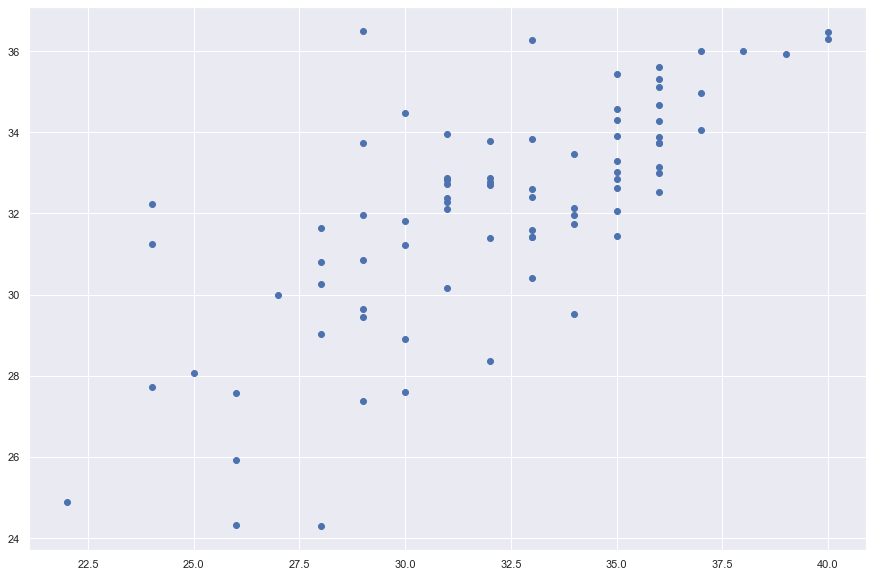

In [60]:
plt.scatter(y_test,reg_pred)

In [61]:
residuals=y_test-reg_pred

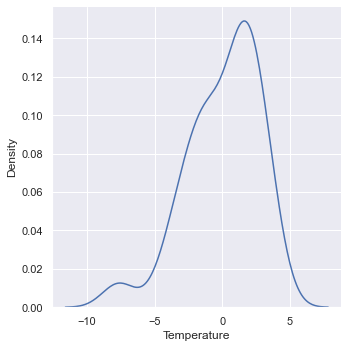

In [62]:
sns.displot(residuals,kind='kde')

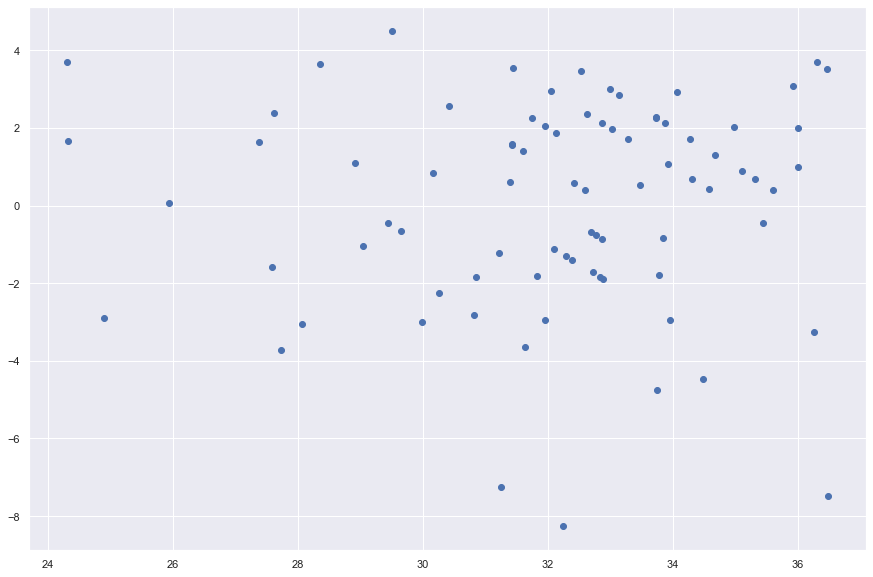

In [63]:
plt.scatter(reg_pred,residuals)

In [64]:
## Performance Metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


print(f"MSE = {mean_squared_error(y_test,reg_pred)}")
print(f"MSE = {mean_absolute_error(y_test,reg_pred)}")
print(f"MSE = {np.sqrt(mean_squared_error(y_test,reg_pred))}")

MSE = 7.1363374654189204
MSE = 2.185398093090284
MSE = 2.671392420708519


## R square and adjusted R Square

In [65]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
score

0.5280945986553494

In [66]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.45286330278881093

### Ridge Regression

In [67]:
from sklearn.linear_model import Ridge

In [68]:
ridge=Ridge()

In [69]:
ridge.fit(X_train,y_train)

Ridge()

In [70]:
ridge_predict=ridge.predict(X_test)

In [71]:
ridge_residuals=y_test-ridge_predict

<AxesSubplot:xlabel='Temperature'>

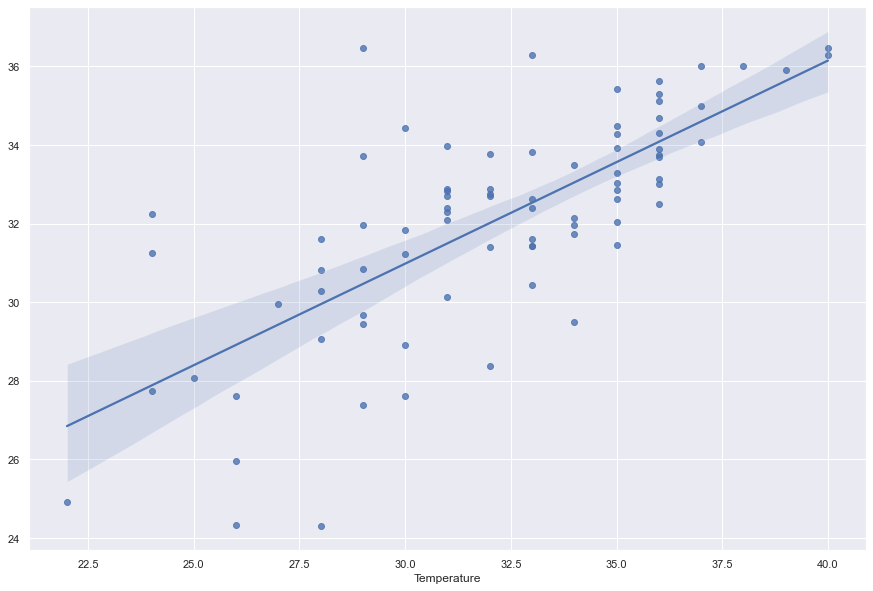

In [88]:
sns.regplot(y_test,ridge_predict)

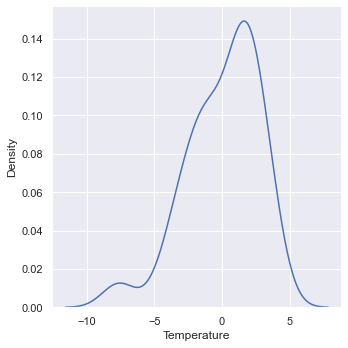

In [73]:
sns.displot(ridge_residuals,kind='kde')

In [74]:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


print(f"MSE = {mean_squared_error(y_test,ridge_predict)}")
print(f"MSE = {mean_absolute_error(y_test,ridge_predict)}")
print(f"MSE = {np.sqrt(mean_squared_error(y_test,ridge_predict))}")

MSE = 7.130575076346081
MSE = 2.185292243110118
MSE = 2.670313666284559


## R square and adjusted R Square

In [75]:
from sklearn.metrics import r2_score
score=r2_score(y_test,ridge_predict)
score

0.5284756488146642

In [76]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.45330510007497304

### Lasso regression

In [77]:
from sklearn.linear_model import Lasso

In [78]:
lasso=Lasso()

In [79]:
lasso.fit(X_train,y_train)

Lasso()

In [80]:
las_predict=lasso.predict(X_test)

In [81]:
residuals=y_test-las_predict

<AxesSubplot:xlabel='Temperature'>

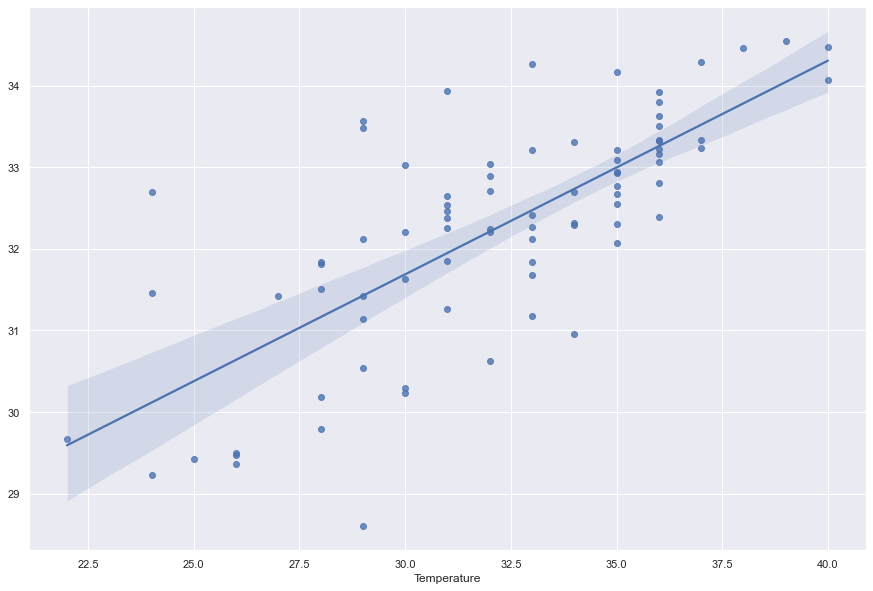

In [87]:
sns.regplot(y_test,las_predict)

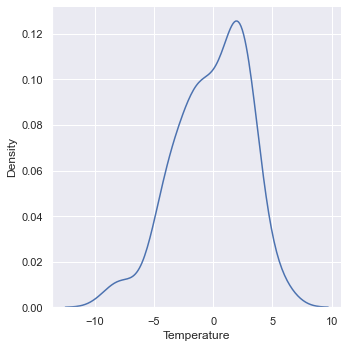

In [83]:
sns.displot(residuals,kind='kde')

In [84]:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


print(f"MSE = {mean_squared_error(y_test,las_predict)}")
print(f"MSE = {mean_absolute_error(y_test,las_predict)}")
print(f"RMSE = {np.sqrt(mean_squared_error(y_test,las_predict))}")

MSE = 9.10609532182792
MSE = 2.4978660766652734
RMSE = 3.0176307464346794


## R square and adjusted R Square

In [85]:
from sklearn.metrics import r2_score
score=r2_score(y_test,las_predict)
score

0.39784019626969913

In [86]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.301843705819941